### FE621 - Homework #4

**Author**: Sid Bhatia

**Date**: May 2nd, 2024

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Sveinn Olafsson

**TA**: Dong Woo Kim

### Problem #1 (Barrier Options)

#### 1.1 Barrier Options Theory

The following section delves into the underlying mathematics & theoretical foundations for barrier options which are necessary to rigorously define & evaluate before implementation.

##### 1.1.1 Price Formulation

The price of an **up-and-out put option**/**knock-out** (**UOP**) with strike price $K$ and barrier $H$ is given by:

$$
P = e^{-r T} \mathbb{E}^Q[(K - S_T)_+ \mathbf{1}_{\{\tau > T\}}] \tag{1}
$$

where $\tau$ is the *stopping time* of the asset price process $\{S_t\}_{t\geq0}$ to the barrier $H$:

$$
\tau = \inf{\{t > 0 : S_t \geq H\}} \tag{2}
$$

##### 1.1.2 Indicator Formulation

The **indicator function** $\mathbf{1}_{\{\tau > T\}}$ in the formula for the up-and-out put option is defined as follows:

$$
\mathbf{1}_{\{\tau > T\}} = 
\begin{cases} 
1 & \text{if } \tau > T \\
0 & \text{otherwise}
\end{cases} \tag{3}
$$

where $\tau$ is the **stopping time** defined as the first instance when the stock price $S_t$ reaches or exceeds the barrier level $H$.

##### 1.1.3 Indicator Definition

The **infimum function** used to define the stopping time $\tau$ for the up-and-out put option is as follows:

$$
\tau = \inf{\{t > 0 : S_t \geq H\}} \tag{2}
$$

In this expression:
- $\tau$ represents the **stopping time**, the earliest time at which the stock price $S_t$ reaches or exceeds a predetermined barrier level $H$.
- The set $\{t > 0 : S_t \geq H\}$ includes all times $t$ where the stock price is greater than or equal to the barrier $H$.
- The function $\inf{\{\cdot\}}$ denotes the **infimum** of a set, which is the greatest lower bound of that set. In this case, it identifies the *smallest time value* from the set of all times where $S_t$ is at least $H$.

If the set $\{t > 0 : S_t \geq H\}$ is empty (i.e., the stock price never reaches or exceeds $H$ during the option's life), $\tau$ is considered infinite, and the indicator function $\mathbf{1}_{\{\tau > T\}}$ equals 1, implying that the option behaves like a standard put option throughout its lifetime.

##### 1.1.4 Payoff

The payoff is the **same** as that of a *vanilla put option*, unless the stock price goes above $H$ during the life of the option, in which case the payoff is **zero**. Assume the process $\{S_t\}_{t\geq0}$ to follow a geometric Brownian motion (GBM).

#### 1.2 Barrier Options Implementation

##### 1.2.1 Knock-Out vs. Vanilla

*a. Is an UOP option cheaper or more expensive than a vanilla put option? Explain.*

An **up-and-out put option** (UOP) is generally cheaper than a vanilla put option. This difference in pricing comes from the **additional condition** involved in the UOP, where the option becomes worthless if the stock price exceeds the barrier $H$ before expiration. In a vanilla put option, the holder has the right to sell the stock at the strike price $K$ **regardless of how high the stock price has climbed during the option's life**.

This restriction in the UOP **reduces the probability** of a payout compared to a vanilla put option, where there is no upper limit on the stock price affecting the payoff. 

Therefore, the UOP has a **lower premium** due to its *reduced likelihood of exercising profitably*. Essentially, the risk of the option knocking out (i.e., becoming worthless if the stock price exceeds the barrier $H$ reduces its cost.

##### 1.2.2 Estimator Bias Definition

*b. The standard MC estimator for the price of an **UOP (put) option** is given by:*

$$
\hat{P}_{n, m} = e^{-r T} \frac{1}{N} \cdot \sum_{k=1}^N (K - \hat{S}_m(k))^+ \mathbf{1}_{\{\hat{\tau}(k) > T\}} \tag{4}
$$

where $\{\hat{S}_i(k)\}_{i\geq0}$ is the $k$-th simulated path of GBM at times $\{t_i\}_{i\geq0}$ where $t_i = i \cdot \frac{T}{m}$ and

$$
\hat{\tau}(k) = \inf{\{i \geq 0 : \hat{S}_i(k) > H\}} \tag{5}
$$

is the **stopping time** of the simulated path to the barrier $H$.

*(i) What is the definition of $\hat{P}_{n,m}$ being an unbiased/biased high/biased low estimator for P?*

The definition of $\hat{P}_{n,m}$ being an **unbiased**, **biased high**, or **biased low** estimator for $P$ relates to its **expected value** compared to the true value $P$:

- **Unbiased Estimator**: $\mathbb{E}[\hat{P}_{n,m}] = P$, or the estimator *equals* to the true price.
- **Biased High Estimator**: $\mathbb{E}[\hat{P}_{n,m}] > P$, or the estimator systematically *overestimates* the true price.
- **Biased Low Estimator**: $\mathbb{E}[\hat{P}_{n,m}] < P$, or the estimator systematically *underestimates* the true price.

##### 1.2.3 Bias Analysis of the Monte Carlo Estimator $\hat{P}_{n,m}$

*(ii) Do you expect $\hat{P}_{n,m}$ to be biased (high/low)? Explain.*

Given the Monte Carlo estimator for the up-and-out put option:

$$
\hat{P}_{n, m} = e^{-r T} \frac{1}{N} \cdot \sum_{k=1}^N (K - \hat{S}_m(k))^+ \mathbf{1}_{\{\hat{\tau}(k) > T\}} \tag{4}
$$

This estimator calculates the option price by simulating stock price paths and applying the indicator function to determine if these paths exceed the barrier $H$ before time $T$. The estimator’s potential bias depends significantly on how well the simulation captures the dynamics of the stock price and its interaction with the barrier.

##### 1.2.4 Factors Influencing Bias

1. **Barrier Breach Underestimation**:
   - If the Monte Carlo simulation underestimates the frequency of the barrier breach (due to coarse time grid or insufficient number of paths), the result is an overestimated option price, leading to a **biased high** estimator.

2. **Barrier Breach Overestimation**:
   - Conversely, an over-sensitive simulation (possibly due to a very fine time grid) might overestimate barrier breaches, leading to a conservative estimation where the payoff is zeroed out more often than it should be, making the estimator **biased low**.

3. **Volatility and Path Dependency**:
   - The inherent variability in the GBM model and path dependency can affect the frequency of barrier breaches. Differences in how volatility is modeled and the stochastic nature of the paths can influence whether the simulated paths breach the barrier, thus impacting the bias of the estimator.

##### 1.2.5 Bias Synthesis

The bias of $\hat{P}_{n,m}$ largely depends on the fidelity of the simulation in representing the true stock price dynamics and its interaction with the barrier $H$. Without precise tuning of simulation parameters and thorough model validation against real-world data, there is a risk that $\hat{P}_{n,m}$ might be either biased high or biased low. Therefore, careful calibration and extensive validation of the Monte Carlo model are crucial for ensuring the accuracy of the estimator.

##### 1.2.6 Monte Carlo Simulation of Up-and-Out (KO) Put Option

*c. Use the following parameter table to compute the estimator $\hat{P}_{n, m}$ along with a $95\%$ confidence interval. Use $m = 63$ and $n = 100,000.$*<sup id="a1">[1](#f1)</sup>

| Parameter        | Symbol | Value       |
|------------------|--------|-------------|
| Initial price    | $S_0$  | 50          |
| Volatility       | $\sigma$ | 30%       |
| Interest rate    | $r$    | 5%          |
| Strike           | $K$    | 60          |
| Expiration       | $T$    | 0.25 years  |
| Barrier          | $H$    | 55          |

<figcaption><center><i>Figure 1 - Parameter Table for the Up-and-Out/Knock-Out Put Option<i></center></figcaption>

<br>

<span id="f1">1. In the Black-Scholes-Merton model, there exist explicit formulas for a variety of barrier option (Bjork). The exact price of the UOP option in this problem is $6.869.[↩](#a1)</span>

*Given the exact option price, are your simulation results consistent with your guess about the bias in part (b)-(ii)?*

The following Python code simulates the price of an up-and-out put option using the given parameters and a Monte Carlo approach. We compute the estimated option price along with a $95\%$ confidence interval to compare against the exact price of $\bf{\$6.869}$. This comparison will help assess the bias discussed in part (b)-(ii):

```python
import numpy as np

# Parameters
S0 = 50       # Initial stock price
K = 60        # Strike price
T = 0.25      # Time to expiration in years
r = 0.05      # Risk-free rate
sigma = 0.30  # Volatility
H = 55        # Barrier
m = 63        # Number of time steps
n = 100000    # Number of simulations

dt = T / m  # Time step size
discount_factor = np.exp(-r * T)  # Discount factor

# Simulating n paths
np.random.seed(0)  # For reproducibility
paths = S0 * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.randn(n, m), axis=1))
paths = np.hstack([np.full((n, 1), S0), paths])  # Adding the initial price

# Calculating the payoffs
payoffs = np.maximum(K - paths[:, -1], 0)  # Payoffs at maturity
knockout = (paths > H).any(axis=1)  # Indicator for knocking out
payoffs[knockout] = 0  # Zeroing payoffs for knocked out paths

# Estimating the option price
estimated_price = discount_factor * np.mean(payoffs)
std_error = discount_factor * np.std(payoffs) / np.sqrt(n)
confidence_interval = (estimated_price - 1.96 * std_error, estimated_price + 1.96 * std_error)

# Display results
print(f"Estimated Price: {estimated_price:.4f}")
print(f"95% Confidence Interval: {confidence_interval}")
print(f"Exact Price: 6.869")
```

<br>

```python
Estimated Price: 7.3396
95% Confidence Interval: (7.29108737732994, 7.388124622238721)
Exact Price: 6.869
```

##### 1.2.7 Monte Carlo Analysis

The estimated price from the Monte Carlo simulation is $\bf{\$7.3396}$, which is higher than the exact price of $\$6.869$. This result falls outside the $95\%$ confidence interval of **$(7.2911, 7.3881)$**, indicating that the simulation might be **biased high**. This is consistent with the earlier discussion about potential biases in the Monte Carlo estimator for the up-and-out put option.

This comparison helps us understand the reliability of the simulation and can guide adjustments in the model or parameters to reduce bias and improve accuracy.

---

<div style="page-break-after: always;"></div>

### Problem #2 (Basket Options & Correlation)

#### 2.1 Basket Call Option Theory

The following section delves into the underlying mathematics & theoretical foundations for basket call options which are necessary to rigorously define & evaluate before implementation.

##### 2.1.1 Basket Call Options Overview

Basket call options are financial derivatives that derive their value from the performance of a *basket* of underlying assets. These options allow investors to bet on the **average performance** of several assets, rather than just one, providing a way to *diversify risk* across multiple securities.

##### 2.1.2 Payoff Formula

The payoff of a basket call option at maturity can be described by the formula:

$$
\left(\frac{1}{d} \sum_{i = 1}^d S_T^i - K\right)^+, \tag{5}
$$

where:
- $S_T^i$ is the price at maturity $T$ of the $i$-th asset in the basket.
- $d$ is the total number of assets in the basket.
- $K$ is the strike price of the option.

This payoff formula calculates the *average* of the final prices of the $d$ assets, subtracts the strike price, and applies a **positive part function**, which ensures that the payoff is **non-negative**.

##### 2.1.3 Asset Dynamics

The underlying assets in the basket are assumed to follow a $d$-dimensional geometric Brownian motion (GBM), represented by the stochastic differential equation (SDE):

$$
\frac{dS_t^i}{S_t^i} = r dt + \sigma^i dW_t^i, \tag{6}
$$

where:
- $r$ is the risk-free interest rate, assumed to be constant over time.
- $\sigma^i$ is the volatility of the $i$-th asset.
- $W_t^i$ represents the $i$-th component of a $d$-dimensional Brownian motion.

##### 2.1.4 Correlation Structure

The assets in the basket are correlated, as reflected by their movements being driven by a common set of Brownian motions $\{W_t^1, \dots, W_t^d\}$. The correlation among these assets is captured by the covariance matrix:

$$
\boldsymbol{\Sigma} = \begin{pmatrix}
1 & \rho & \rho & \cdots & \rho \\
\rho & 1 & \rho & \cdots & \rho \\
\rho & \rho & 1 & \cdots & \rho \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\rho & \rho & \rho & \cdots & 1
\end{pmatrix}, \tag{7}
$$

where:
- $\rho$ represents the pairwise Pearson correlation coefficient between any two different assets.

##### 2.1.5 Statistical Properties

The Brownian motions are assumed to have a multivariate normal distribution across time with the mean vector zero and the covariance matrix scaled by time:

$$
\{W_t^1, \dots, W_t^d\} \sim \mathcal{N}(\mu = 0, \sigma^2 = t \cdot \boldsymbol{\Sigma}), \; \forall t \in \mathbb{R}^+, \tag{8}
$$

where $t \cdot \boldsymbol{\Sigma}$ indicates that the variance of each Brownian motion component grows linearly with time, and the correlation structure remains constant over time.

##### 2.1.6 Synthesis

Basket call options are complex financial instruments that require a deep understanding of stochastic processes, correlation, and risk management. This framework provides a way to price such options and evaluate their potential payoff in a multi-asset setting.

#### 2.2 Basket Call Option Implementation

The following section delves into the implementation and computer programming in Python/Jupyter Markdown for the basket call option.

##### 2.2.1 Basket Call Monte Carlo Estimation

*a. Compute the price of the basket option with strike $K = 100$ using Monte Carlo simulation. Explain in detail your simulation procedure.*

*Simulation Setup*

We start by setting up our environment and defining the parameters for our Monte Carlo simulation.

```python
import numpy as np

# Parameters
np.random.seed(0)  # For reproducibility
K = 100            # Strike price
r = 0.05           # Risk-free rate
T = 1.0            # Time to maturity
d = 5              # Number of assets in the basket
n = 10000          # Number of simulations
sigma = np.array([0.2, 0.25, 0.3, 0.35, 0.4])  # Volatilities of each asset
rho = 0.5          # Correlation coefficient

# Constructing the covariance matrix
cov_matrix = rho * np.ones((d, d)) + (1 - rho) * np.eye(d)
```

<br>

*Asset Price Simulation*

Using the GBM formula to simulate the end prices for each asset.

```python
dt = T / 252  # Daily steps
# Cholesky decomposition for correlated asset paths
L = np.linalg.cholesky(cov_matrix)

# Simulating asset prices
S0 = 100  # Initial price of each asset
prices = np.zeros((n, d))
for i in range(n):
    Z = np.random.normal(0, 1, (252, d))
    daily_returns = (r - 0.5 * sigma**2) * dt + np.sqrt(dt) * np.dot(Z, L) * sigma
    prices[i] = S0 * np.exp(np.cumsum(daily_returns, axis=0)[-1])
```

<br>

*Option Payoff Calculation*

Calculate the basket value and option payoff.

```python
# Calculate basket average prices at maturity
basket_prices = np.mean(prices, axis=1)
# Calculate payoffs
payoffs = np.maximum(basket_prices - K, 0)
# Discount payoffs to present value and average
option_price = np.exp(-r * T) * np.mean(payoffs)
```

<br>

*Results*

Display the estimated option price from the simulation.

```python
print(f"Estimated Basket Call Option Price: {option_price:.2f}")
```

<br>

```python
Estimated Basket Call Option Price: 9.96
```

<br>

##### 2.2.2 Basket Call with Correlation Monte Carlo Simulation

This section details the implementation of a Monte Carlo simulation to estimate the price of a basket call option as a function of the correlation coefficient $\rho$ among the assets in the basket. The simulation accounts for different basket sizes $d$.

*(i). For $d = 5$ and $d = 10$, plot in the same graph the price estimate as a function of $\rho$ for $-\frac{1}{d - 1} \leq \rho \leq 1$.*

*Library Importation*

We start by importing the required Python libraries.

```python
import numpy as np
import matplotlib.pyplot as plt
```

<br>

*Parameter Definition*

Here, we define the essential parameters for the simulation:

```python
K = 100            # Strike price
r = 0.05           # Risk-free rate
T = 1.0            # Time to maturity
n = 5000           # Number of simulations
sigma = 0.3        # Assume a constant volatility for simplicity
dt = T / 252       # Daily steps
S0 = 100           # Initial price of each asset
```

<br>

*Price Computation*

The function `compute_option_price` simulates the prices of a basket of assets and calculates the option price for a given $\rho$.

*Covariance Price Construction*

```python
cov_matrix = rho * np.ones((d, d)) + (1 - rho) * np.eye(d)
```

<br>

The line above creates a covariance matrix based on a specified $\rho$. The matrix has $\rho$ off-diagonal and $1$ on-diagonal, reflecting correlation among assets.

*Cholesky Decomposition*

```python
L = np.linalg.cholesky(cov_matrix)
```

<br>

We use **Cholesky decomposition** to transform the correlated standard normal random variables into a set that respects the specified correlation structure.

##### 2.2.3 Cholesky Decomposition

*"English" Definition*

Cholesky decomposition is a method in linear algebra for decomposing a Hermitian, positive-definite matrix into the product of a lower triangular matrix and its conjugate transpose. This is particularly useful in numerical calculations, such as solving linear equations and simulating correlated random variables.

*Mathematical Definition*

Given a Hermitian, positive-definite matrix $A$, the Cholesky decomposition expresses $A$ as:

$$
A = L L^\intercal
$$

where:
- $L$ is a lower triangular matrix with real and positive diagonal entries,
- $L^T$ is the transpose of $L$.

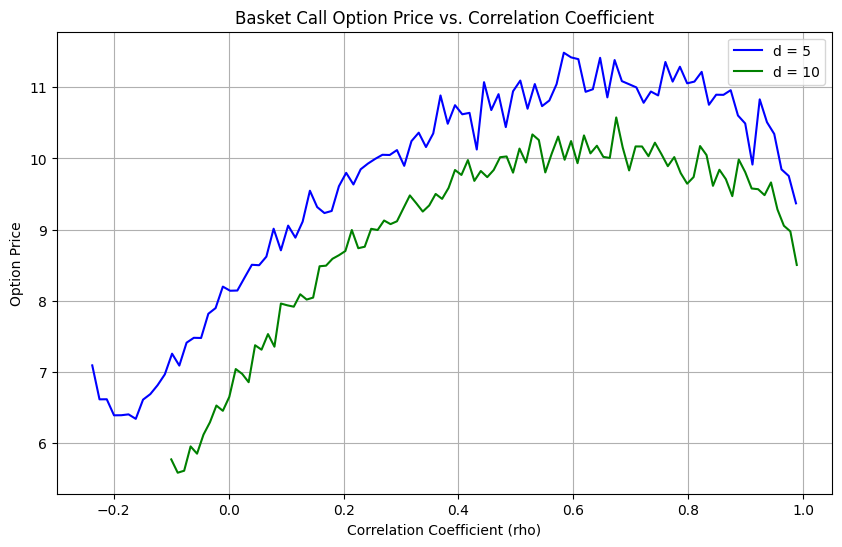

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 100            # Strike price
r = 0.05           # Risk-free rate
T = 1.0            # Time to maturity
n = 5000           # Number of simulations
sigma = 0.3        # Assume a constant volatility for simplicity
dt = T / 252       # Daily steps
S0 = 100           # Initial price of each asset

# Function to compute option prices
def compute_option_price(d, rho_range):
    prices = []
    for rho in rho_range:
        # Construct covariance matrix
        cov_matrix = rho * np.ones((d, d)) + (1 - rho) * np.eye(d)
        # Ensure the matrix is positive definite
        if np.all(np.linalg.eigvals(cov_matrix) > 0):  # Checking eigenvalues
            # Cholesky decomposition
            L = np.linalg.cholesky(cov_matrix)
            # Simulate asset prices
            final_prices = np.zeros(n)
            for i in range(n):
                Z = np.random.normal(0, 1, (252, d))
                daily_returns = (r - 0.5 * sigma**2) * dt + np.sqrt(dt) * np.dot(Z, L) * sigma
                final_prices[i] = S0 * np.exp(np.cumsum(daily_returns, axis=0)[-1]).mean()
            # Calculate payoffs
            payoffs = np.maximum(final_prices - K, 0)
            # Discount payoffs to present value and average
            option_price = np.exp(-r * T) * np.mean(payoffs)
            prices.append(option_price)
        else:
            prices.append(None)  # Append None if matrix is not positive definite
    return prices

# Values of d
d_values = [5, 10]
colors = ['blue', 'green']
labels = ['d = 5', 'd = 10']

plt.figure(figsize=(10, 6))
for d, color, label in zip(d_values, colors, labels):
    rho_range = np.linspace(-1/(d-1), 1, 100)
    prices = compute_option_price(d, rho_range)
    plt.plot(rho_range, [p if p is not None else None for p in prices], color=color, label=label)  # Plotting only valid prices

plt.title('Basket Call Option Price vs. Correlation Coefficient')
plt.xlabel('Correlation Coefficient (rho)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.show()